In [1]:
import pandas as pd
import numpy as np
import random

In [2]:
df_monday = pd.read_csv('data/monday.csv', sep=';', index_col=0)

df_tuesday = pd.read_csv('data/tuesday.csv', sep=';', index_col=0)

df_wednesday = pd.read_csv('data/wednesday.csv', sep=';', index_col=0)

df_thursday = pd.read_csv('data/thursday.csv', sep=';', index_col=0)

df_friday = pd.read_csv('data/friday.csv', sep=';', index_col=0)

In [3]:
# put together every dataframe for each day into one df
frames = [df_monday, df_tuesday, df_wednesday, df_thursday, df_friday]
df = pd.concat(frames)
df.head()

,customer_no,location
timestamp,,
2019-09-02 07:03:00,1,dairy
2019-09-02 07:03:00,2,dairy
2019-09-02 07:04:00,3,dairy
2019-09-02 07:04:00,4,dairy
2019-09-02 07:04:00,5,spices


In [4]:
df.index = pd.to_datetime(df.index)

In [5]:
# Calculate the total number of customers in each section
df.groupby('location').count()

,customer_no
location,
checkout,7417
dairy,4679
drinks,3905
fruit,5122
spices,3754


<AxesSubplot:xlabel='location'>

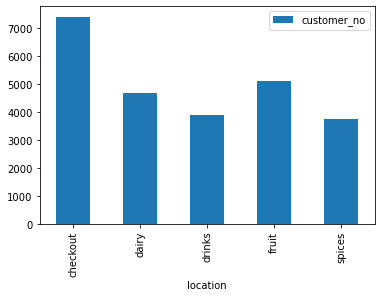

In [6]:
df.groupby('location').count().plot(kind='bar')

In [7]:
df['day'] = df.index.day
df.head()

,customer_no,location,day
timestamp,,,
2019-09-02 07:03:00,1,dairy,2
2019-09-02 07:03:00,2,dairy,2
2019-09-02 07:04:00,3,dairy,2
2019-09-02 07:04:00,4,dairy,2
2019-09-02 07:04:00,5,spices,2


In [8]:
df.index

DatetimeIndex(['2019-09-02 07:03:00', '2019-09-02 07:03:00',
               '2019-09-02 07:04:00', '2019-09-02 07:04:00',
               '2019-09-02 07:04:00', '2019-09-02 07:04:00',
               '2019-09-02 07:04:00', '2019-09-02 07:04:00',
               '2019-09-02 07:05:00', '2019-09-02 07:05:00',
               ...
               '2019-09-06 21:49:00', '2019-09-06 21:49:00',
               '2019-09-06 21:49:00', '2019-09-06 21:49:00',
               '2019-09-06 21:50:00', '2019-09-06 21:50:00',
               '2019-09-06 21:50:00', '2019-09-06 21:50:00',
               '2019-09-06 21:50:00', '2019-09-06 21:50:00'],
              dtype='datetime64[ns]', name='timestamp', length=24877, freq=None)

In [9]:
# Calculate the total number of customers in each section over time (here complete time)
df.groupby(['location', 'day']).count()
df.head(6)

,customer_no,location,day
timestamp,,,
2019-09-02 07:03:00,1,dairy,2
2019-09-02 07:03:00,2,dairy,2
2019-09-02 07:04:00,3,dairy,2
2019-09-02 07:04:00,4,dairy,2
2019-09-02 07:04:00,5,spices,2
2019-09-02 07:04:00,6,spices,2


In [10]:
# Calculate the total number of customers in each section over time (here hourly)
df.groupby('location').resample('h').count()

customer_no  location  day
location timestamp                                      
checkout 2019-09-02 07:00:00           92        92   92
         2019-09-02 08:00:00          112       112  112
         2019-09-02 09:00:00           85        85   85
         2019-09-02 10:00:00           90        90   90
         2019-09-02 11:00:00           55        55   55
...                                   ...       ...  ...
spices   2019-09-06 17:00:00           65        65   65
         2019-09-06 18:00:00           98        98   98
         2019-09-06 19:00:00           65        65   65
         2019-09-06 20:00:00           54        54   54
         2019-09-06 21:00:00           20        20   20

[555 rows x 3 columns]

In [11]:
# Display the number of customers at checkout over time (here one day)
df[(df.location == 'checkout') & (df.day==2)].count()

customer_no    1437
location       1437
day            1437
dtype: int64

In [12]:
# Calculate the total number of customers in each section over time (here day)
df.groupby(['location', 'day']).count()
df.head(7)

,customer_no,location,day
timestamp,,,
2019-09-02 07:03:00,1,dairy,2
2019-09-02 07:03:00,2,dairy,2
2019-09-02 07:04:00,3,dairy,2
2019-09-02 07:04:00,4,dairy,2
2019-09-02 07:04:00,5,spices,2
2019-09-02 07:04:00,6,spices,2
2019-09-02 07:04:00,7,spices,2


<AxesSubplot:xlabel='location,day'>

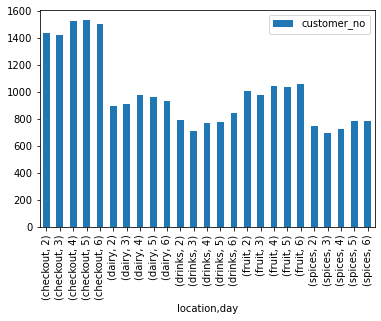

In [13]:
df.groupby(['location', 'day']).count().plot(kind='bar')

In [14]:
df.reset_index(inplace=True)
df

,timestamp,customer_no,location,day
0,2019-09-02 07:03:00,1,dairy,2
1,2019-09-02 07:03:00,2,dairy,2
2,2019-09-02 07:04:00,3,dairy,2
3,2019-09-02 07:04:00,4,dairy,2
4,2019-09-02 07:04:00,5,spices,2
...,...,...,...,...
24872,2019-09-06 21:50:00,1500,dairy,6
24873,2019-09-06 21:50:00,1507,checkout,6
24874,2019-09-06 21:50:00,1508,checkout,6
24875,2019-09-06 21:50:00,1509,drinks,6


In [15]:
df[df.location == 'checkout'].groupby(['day', 'timestamp'])[['customer_no']].count()

customer_no
day timestamp                       
2   2019-09-02 07:05:00            2
    2019-09-02 07:06:00            2
    2019-09-02 07:07:00            1
    2019-09-02 07:08:00            3
    2019-09-02 07:09:00            1
...                              ...
6   2019-09-06 21:37:00            1
    2019-09-06 21:45:00            1
    2019-09-06 21:47:00            2
    2019-09-06 21:48:00            2
    2019-09-06 21:50:00            2

[3460 rows x 1 columns]

In [16]:
# create new column 'time_spend'
df['time_spend'] = df.groupby(['day', 'customer_no'])['timestamp'].transform(lambda x : x.max()-x.min())

In [17]:
# find customers who were not checked-out
df[df['time_spend'] == 0]

,timestamp,customer_no,location,day,time_spend


In [18]:
# Calculate the time each customer spent in the market
df['time_spend']

0       0 days 00:02:00
1       0 days 00:03:00
2       0 days 00:02:00
3       0 days 00:04:00
4       0 days 00:01:00
              ...      
24872   0 days 00:09:00
24873   0 days 00:02:00
24874   0 days 00:02:00
24875   0 days 00:00:00
24876   0 days 00:00:00
Name: time_spend, Length: 24877, dtype: timedelta64[ns]

In [20]:
df = df.set_index(['timestamp'])
df = df.groupby('customer_no').resample('T').ffill()

In [21]:
df

customer_no  location  day      time_spend
customer_no timestamp                                                      
1           2019-09-02 07:03:00            1     dairy    2 0 days 00:02:00
            2019-09-02 07:04:00            1     dairy    2 0 days 00:02:00
            2019-09-02 07:05:00            1  checkout    2 0 days 00:02:00
            2019-09-02 07:06:00            1  checkout    2 0 days 00:02:00
            2019-09-02 07:07:00            1  checkout    2 0 days 00:02:00
...                                      ...       ...  ...             ...
1533        2019-09-05 21:48:00         1533     dairy    5 0 days 00:00:00
1534        2019-09-05 21:48:00         1534     fruit    5 0 days 00:01:00
            2019-09-05 21:49:00         1534  checkout    5 0 days 00:01:00
1535        2019-09-05 21:48:00         1535    spices    5 0 days 00:01:00
            2019-09-05 21:49:00         1535  checkout    5 0 days 00:01:00

[8526802 rows x 4 columns]

In [23]:
# create a new column 'next location'
df.drop(columns='customer_no', inplace=True)

df['next_location'] = df.groupby(['day', 'customer_no'])['location'].shift(-1)


In [24]:
df.head(10)

location  day      time_spend next_location
customer_no timestamp                                                       
1           2019-09-02 07:03:00     dairy    2 0 days 00:02:00         dairy
            2019-09-02 07:04:00     dairy    2 0 days 00:02:00      checkout
            2019-09-02 07:05:00  checkout    2 0 days 00:02:00      checkout
            2019-09-02 07:06:00  checkout    2 0 days 00:02:00      checkout
            2019-09-02 07:07:00  checkout    2 0 days 00:02:00      checkout
            2019-09-02 07:08:00  checkout    2 0 days 00:02:00      checkout
            2019-09-02 07:09:00  checkout    2 0 days 00:02:00      checkout
            2019-09-02 07:10:00  checkout    2 0 days 00:02:00      checkout
            2019-09-02 07:11:00  checkout    2 0 days 00:02:00      checkout
            2019-09-02 07:12:00  checkout    2 0 days 00:02:00      checkout

In [25]:
df.next_location.fillna('checkout', inplace=True)

In [26]:
df.head(10)

location  day      time_spend next_location
customer_no timestamp                                                       
1           2019-09-02 07:03:00     dairy    2 0 days 00:02:00         dairy
            2019-09-02 07:04:00     dairy    2 0 days 00:02:00      checkout
            2019-09-02 07:05:00  checkout    2 0 days 00:02:00      checkout
            2019-09-02 07:06:00  checkout    2 0 days 00:02:00      checkout
            2019-09-02 07:07:00  checkout    2 0 days 00:02:00      checkout
            2019-09-02 07:08:00  checkout    2 0 days 00:02:00      checkout
            2019-09-02 07:09:00  checkout    2 0 days 00:02:00      checkout
            2019-09-02 07:10:00  checkout    2 0 days 00:02:00      checkout
            2019-09-02 07:11:00  checkout    2 0 days 00:02:00      checkout
            2019-09-02 07:12:00  checkout    2 0 days 00:02:00      checkout

In [27]:
transition_probes = pd.crosstab(df['location'], df['next_location'], normalize=0)

In [28]:
transition_probes

next_location,checkout,dairy,drinks,fruit,spices
location,,,,,
checkout,1.000000,0.000000,0.000000,0.000000,0.000000
dairy,0.053250,0.864514,0.030143,0.025655,0.026437
drinks,0.215710,0.010899,0.598499,0.087909,0.086983
fruit,0.095683,0.045526,0.026031,0.808709,0.024051
spices,0.071016,0.091059,0.076871,0.042865,0.718189


In [29]:
# all rows have to sum up to one
assert all(transition_probes.sum(axis=1) > 0.999)

In [30]:
class Customer:
       
    def __init__(self, name, state, transition_probes, budget=100):
        
        self.name = name
        self.state = state
        self.transition_probes = transition_probes
        self.budget = budget
        
    def __repr__(self):
        
        return f'<Customer {self.name} in {self.state}>'
    
    def next_state(self):
        
        '''
        Propagates the customer to the next state.
        Returns nothing.
        '''
        
        self.state = random.choices(transition_probes.columns, transition_probes.loc[self.state])[0]
        return self.state
        
        
    def is_active(self):
        
        if self.state != 'checkout':
            return True
        #else:
         #   return False
        

In [31]:
class Supermarket:
    """manages multiple Customer instances that are currently in the market.
    """

    def __init__(self, name):        
        # a list of Customer objects                  
        self.customers = []
        self.minutes = 0
        self.last_id = 0
        self.name = name
        # opens at 7
        # closes at 10


    def __repr__(self):
        return f'{self.name} supermarket at {self.get_time()} with {len(self.customers)} customers.'


    def get_time(self):
        """current time in HH:MM format,
        """
        hours = self.minutes // 60  # integer division
        minutes = self.minutes % 60 # remainder/ modulo
        return f'{hours:02d}:{minutes:02d}:00'


    def is_open(self):  
        # supermarket closes after 15hours    
        return self.minutes < 900


    def print_customers(self):
        """print all customers with the current time and id in CSV format.     
        """
        
        for customer in self.customers:
            
            print(f'{self.get_time()}, {customer.name}, {customer.state}')


    def next_minute(self):
        """propagates all customers to the next state.
        """
        self.minutes += 1
        # for every customer determine their next state
        for customer in self.customers:
            customer.next_state()
   

    def add_new_customers(self):
        """randomly creates new customers.
        """
        self.last_id += 1
        new_customer = Customer(self.last_id, random.choices(['fruit', 'dairy', 'drinks', 'spices'])[0], transition_probes)
        self.customers.append(new_customer)
        


    def remove_exitsting_customers(self):
        """removes every customer that is not active any more.
        """
        self.customers = [customer for customer in self.customers if customer.is_active()]
                

In [32]:
lidl = Supermarket(name='LIDL')

while lidl.is_open():
    
    print(lidl.get_time())

    # increase the time of the supermarket by one minute
    lidl.next_minute()

    # remove churned customers from the supermarket
    lidl.remove_exitsting_customers()

    # generate new customers at their initial location
    lidl.add_new_customers()
    

    # repeat from step 1
    print(lidl.print_customers())

00:00:00
00:01:00, 1, fruit
None
00:01:00
00:02:00, 1, fruit
00:02:00, 2, fruit
None
00:02:00
00:03:00, 1, dairy
00:03:00, 2, fruit
00:03:00, 3, dairy
None
00:03:00
00:04:00, 1, dairy
00:04:00, 2, fruit
00:04:00, 3, dairy
00:04:00, 4, fruit
None
00:04:00
00:05:00, 1, dairy
00:05:00, 2, fruit
00:05:00, 3, dairy
00:05:00, 4, fruit
00:05:00, 5, spices
None
00:05:00
00:06:00, 1, dairy
00:06:00, 2, fruit
00:06:00, 3, dairy
00:06:00, 4, fruit
00:06:00, 5, spices
00:06:00, 6, dairy
None
00:06:00
00:07:00, 1, dairy
00:07:00, 2, fruit
00:07:00, 3, spices
00:07:00, 4, fruit
00:07:00, 5, spices
00:07:00, 6, dairy
00:07:00, 7, dairy
None
00:07:00
00:08:00, 1, dairy
00:08:00, 2, fruit
00:08:00, 3, dairy
00:08:00, 4, fruit
00:08:00, 5, spices
00:08:00, 6, dairy
00:08:00, 7, drinks
00:08:00, 8, fruit
None
00:08:00
00:09:00, 1, dairy
00:09:00, 3, dairy
00:09:00, 4, fruit
00:09:00, 5, spices
00:09:00, 6, dairy
00:09:00, 7, spices
00:09:00, 8, fruit
00:09:00, 9, dairy
None
00:09:00
00:10:00, 1, dairy
00

01:45:00, 99, spices
01:45:00, 101, drinks
01:45:00, 102, dairy
01:45:00, 103, drinks
01:45:00, 104, spices
01:45:00, 105, spices
None
01:45:00
01:46:00, 56, dairy
01:46:00, 69, dairy
01:46:00, 76, fruit
01:46:00, 89, drinks
01:46:00, 90, dairy
01:46:00, 91, fruit
01:46:00, 94, dairy
01:46:00, 96, spices
01:46:00, 97, drinks
01:46:00, 98, dairy
01:46:00, 99, spices
01:46:00, 101, drinks
01:46:00, 102, dairy
01:46:00, 103, drinks
01:46:00, 104, spices
01:46:00, 105, drinks
01:46:00, 106, dairy
None
01:46:00
01:47:00, 56, dairy
01:47:00, 69, dairy
01:47:00, 76, fruit
01:47:00, 90, dairy
01:47:00, 91, fruit
01:47:00, 94, dairy
01:47:00, 96, spices
01:47:00, 97, drinks
01:47:00, 98, dairy
01:47:00, 99, spices
01:47:00, 101, fruit
01:47:00, 102, dairy
01:47:00, 103, drinks
01:47:00, 104, spices
01:47:00, 105, drinks
01:47:00, 106, dairy
01:47:00, 107, spices
None
01:47:00
01:48:00, 56, fruit
01:48:00, 69, dairy
01:48:00, 76, fruit
01:48:00, 90, dairy
01:48:00, 91, fruit
01:48:00, 94, dairy


02:23:00, 136, dairy
02:23:00, 138, fruit
02:23:00, 141, drinks
02:23:00, 142, dairy
02:23:00, 143, fruit
None
02:23:00
02:24:00, 97, dairy
02:24:00, 123, dairy
02:24:00, 135, dairy
02:24:00, 136, dairy
02:24:00, 138, fruit
02:24:00, 142, dairy
02:24:00, 143, fruit
02:24:00, 144, drinks
None
02:24:00
02:25:00, 97, dairy
02:25:00, 123, dairy
02:25:00, 135, dairy
02:25:00, 136, dairy
02:25:00, 138, fruit
02:25:00, 142, dairy
02:25:00, 143, dairy
02:25:00, 144, fruit
02:25:00, 145, fruit
None
02:25:00
02:26:00, 123, dairy
02:26:00, 135, dairy
02:26:00, 136, dairy
02:26:00, 138, fruit
02:26:00, 142, dairy
02:26:00, 143, dairy
02:26:00, 144, fruit
02:26:00, 145, fruit
02:26:00, 146, drinks
None
02:26:00
02:27:00, 123, fruit
02:27:00, 136, dairy
02:27:00, 138, fruit
02:27:00, 142, spices
02:27:00, 143, dairy
02:27:00, 144, fruit
02:27:00, 145, dairy
02:27:00, 147, dairy
None
02:27:00
02:28:00, 123, drinks
02:28:00, 136, dairy
02:28:00, 138, fruit
02:28:00, 142, spices
02:28:00, 143, dairy
02

03:16:00, 183, dairy
03:16:00, 187, fruit
03:16:00, 189, fruit
03:16:00, 190, spices
03:16:00, 191, fruit
03:16:00, 193, fruit
03:16:00, 194, fruit
03:16:00, 195, fruit
03:16:00, 196, drinks
None
03:16:00
03:17:00, 151, spices
03:17:00, 166, fruit
03:17:00, 167, dairy
03:17:00, 177, spices
03:17:00, 183, dairy
03:17:00, 187, fruit
03:17:00, 189, fruit
03:17:00, 190, spices
03:17:00, 191, fruit
03:17:00, 194, fruit
03:17:00, 195, fruit
03:17:00, 196, fruit
03:17:00, 197, spices
None
03:17:00
03:18:00, 151, spices
03:18:00, 166, fruit
03:18:00, 167, dairy
03:18:00, 177, dairy
03:18:00, 183, dairy
03:18:00, 187, fruit
03:18:00, 189, fruit
03:18:00, 190, spices
03:18:00, 194, fruit
03:18:00, 195, drinks
03:18:00, 196, fruit
03:18:00, 197, spices
03:18:00, 198, fruit
None
03:18:00
03:19:00, 151, spices
03:19:00, 166, fruit
03:19:00, 167, dairy
03:19:00, 177, dairy
03:19:00, 183, dairy
03:19:00, 187, fruit
03:19:00, 189, fruit
03:19:00, 190, spices
03:19:00, 194, fruit
03:19:00, 196, fruit
0

04:15:00
04:16:00, 220, dairy
04:16:00, 230, fruit
04:16:00, 236, drinks
04:16:00, 243, dairy
04:16:00, 249, fruit
04:16:00, 251, fruit
04:16:00, 252, dairy
04:16:00, 254, fruit
04:16:00, 256, dairy
None
04:16:00
04:17:00, 220, drinks
04:17:00, 230, fruit
04:17:00, 243, dairy
04:17:00, 249, fruit
04:17:00, 251, fruit
04:17:00, 252, dairy
04:17:00, 254, fruit
04:17:00, 256, drinks
04:17:00, 257, spices
None
04:17:00
04:18:00, 220, drinks
04:18:00, 230, fruit
04:18:00, 243, dairy
04:18:00, 249, fruit
04:18:00, 251, fruit
04:18:00, 254, dairy
04:18:00, 256, drinks
04:18:00, 257, spices
04:18:00, 258, spices
None
04:18:00
04:19:00, 220, drinks
04:19:00, 230, spices
04:19:00, 243, dairy
04:19:00, 249, fruit
04:19:00, 251, fruit
04:19:00, 254, dairy
04:19:00, 256, fruit
04:19:00, 257, spices
04:19:00, 258, drinks
04:19:00, 259, dairy
None
04:19:00
04:20:00, 220, spices
04:20:00, 230, spices
04:20:00, 243, dairy
04:20:00, 249, fruit
04:20:00, 251, drinks
04:20:00, 254, dairy
04:20:00, 257, sp

05:32:00, 307, fruit
05:32:00, 312, spices
05:32:00, 318, dairy
05:32:00, 320, fruit
05:32:00, 322, dairy
05:32:00, 328, dairy
05:32:00, 329, drinks
05:32:00, 330, fruit
05:32:00, 331, spices
05:32:00, 332, dairy
None
05:32:00
05:33:00, 307, dairy
05:33:00, 312, spices
05:33:00, 318, dairy
05:33:00, 320, spices
05:33:00, 322, dairy
05:33:00, 328, dairy
05:33:00, 329, drinks
05:33:00, 330, fruit
05:33:00, 331, spices
05:33:00, 332, dairy
05:33:00, 333, dairy
None
05:33:00
05:34:00, 307, dairy
05:34:00, 312, spices
05:34:00, 318, dairy
05:34:00, 320, spices
05:34:00, 322, dairy
05:34:00, 328, dairy
05:34:00, 329, fruit
05:34:00, 330, fruit
05:34:00, 331, spices
05:34:00, 332, dairy
05:34:00, 333, dairy
05:34:00, 334, fruit
None
05:34:00
05:35:00, 307, dairy
05:35:00, 318, dairy
05:35:00, 320, dairy
05:35:00, 322, dairy
05:35:00, 328, fruit
05:35:00, 330, fruit
05:35:00, 331, spices
05:35:00, 332, dairy
05:35:00, 333, dairy
05:35:00, 334, fruit
05:35:00, 335, fruit
None
05:35:00
05:36:00,

06:26:00, 376, dairy
06:26:00, 377, spices
06:26:00, 379, dairy
06:26:00, 384, dairy
06:26:00, 385, dairy
06:26:00, 386, dairy
None
06:26:00
06:27:00, 361, spices
06:27:00, 362, dairy
06:27:00, 369, fruit
06:27:00, 372, fruit
06:27:00, 374, drinks
06:27:00, 375, dairy
06:27:00, 377, spices
06:27:00, 385, dairy
06:27:00, 386, dairy
06:27:00, 387, drinks
None
06:27:00
06:28:00, 362, dairy
06:28:00, 369, fruit
06:28:00, 372, fruit
06:28:00, 374, fruit
06:28:00, 375, dairy
06:28:00, 377, spices
06:28:00, 385, dairy
06:28:00, 386, dairy
06:28:00, 387, drinks
06:28:00, 388, drinks
None
06:28:00
06:29:00, 362, dairy
06:29:00, 369, dairy
06:29:00, 372, fruit
06:29:00, 374, fruit
06:29:00, 377, drinks
06:29:00, 386, dairy
06:29:00, 388, fruit
06:29:00, 389, dairy
None
06:29:00
06:30:00, 362, dairy
06:30:00, 369, dairy
06:30:00, 372, drinks
06:30:00, 374, fruit
06:30:00, 377, drinks
06:30:00, 386, dairy
06:30:00, 388, fruit
06:30:00, 389, fruit
06:30:00, 390, drinks
None
06:30:00
06:31:00, 362, 

07:44:00, 431, dairy
07:44:00, 436, fruit
07:44:00, 441, fruit
07:44:00, 443, spices
07:44:00, 455, dairy
07:44:00, 457, fruit
07:44:00, 460, spices
07:44:00, 462, spices
07:44:00, 463, fruit
07:44:00, 464, fruit
None
07:44:00
07:45:00, 431, dairy
07:45:00, 436, fruit
07:45:00, 441, fruit
07:45:00, 443, spices
07:45:00, 455, dairy
07:45:00, 457, fruit
07:45:00, 462, drinks
07:45:00, 463, fruit
07:45:00, 464, drinks
07:45:00, 465, fruit
None
07:45:00
07:46:00, 431, drinks
07:46:00, 436, fruit
07:46:00, 441, fruit
07:46:00, 443, spices
07:46:00, 455, dairy
07:46:00, 462, spices
07:46:00, 463, fruit
07:46:00, 465, fruit
07:46:00, 466, fruit
None
07:46:00
07:47:00, 431, fruit
07:47:00, 436, fruit
07:47:00, 441, fruit
07:47:00, 443, spices
07:47:00, 455, dairy
07:47:00, 462, spices
07:47:00, 463, fruit
07:47:00, 465, dairy
07:47:00, 466, fruit
07:47:00, 467, drinks
None
07:47:00
07:48:00, 431, fruit
07:48:00, 436, fruit
07:48:00, 441, fruit
07:48:00, 443, fruit
07:48:00, 455, dairy
07:48:00

08:35:00, 479, dairy
08:35:00, 485, dairy
08:35:00, 493, fruit
08:35:00, 496, drinks
08:35:00, 497, drinks
08:35:00, 500, dairy
08:35:00, 502, drinks
08:35:00, 503, fruit
08:35:00, 504, dairy
08:35:00, 505, dairy
08:35:00, 507, dairy
08:35:00, 508, fruit
08:35:00, 509, fruit
08:35:00, 510, drinks
08:35:00, 511, spices
08:35:00, 512, fruit
08:35:00, 513, drinks
08:35:00, 514, dairy
08:35:00, 515, fruit
None
08:35:00
08:36:00, 479, dairy
08:36:00, 485, dairy
08:36:00, 493, drinks
08:36:00, 496, drinks
08:36:00, 497, drinks
08:36:00, 500, dairy
08:36:00, 502, drinks
08:36:00, 503, fruit
08:36:00, 504, dairy
08:36:00, 505, dairy
08:36:00, 507, dairy
08:36:00, 508, fruit
08:36:00, 509, fruit
08:36:00, 510, drinks
08:36:00, 511, spices
08:36:00, 512, fruit
08:36:00, 513, drinks
08:36:00, 514, dairy
08:36:00, 515, fruit
08:36:00, 516, fruit
None
08:36:00
08:37:00, 479, dairy
08:37:00, 485, fruit
08:37:00, 493, drinks
08:37:00, 496, drinks
08:37:00, 497, drinks
08:37:00, 500, dairy
08:37:00, 5

09:37:00, 559, dairy
09:37:00, 560, dairy
09:37:00, 562, drinks
09:37:00, 564, spices
09:37:00, 570, fruit
09:37:00, 571, spices
09:37:00, 573, dairy
09:37:00, 574, spices
09:37:00, 576, fruit
09:37:00, 577, spices
None
09:37:00
09:38:00, 559, dairy
09:38:00, 560, dairy
09:38:00, 562, drinks
09:38:00, 564, dairy
09:38:00, 570, fruit
09:38:00, 573, dairy
09:38:00, 574, spices
09:38:00, 576, drinks
09:38:00, 577, fruit
09:38:00, 578, spices
None
09:38:00
09:39:00, 559, drinks
09:39:00, 560, dairy
09:39:00, 562, dairy
09:39:00, 564, dairy
09:39:00, 570, dairy
09:39:00, 573, dairy
09:39:00, 574, spices
09:39:00, 576, drinks
09:39:00, 578, spices
09:39:00, 579, dairy
None
09:39:00
09:40:00, 559, drinks
09:40:00, 560, dairy
09:40:00, 562, dairy
09:40:00, 564, dairy
09:40:00, 570, dairy
09:40:00, 573, dairy
09:40:00, 574, spices
09:40:00, 576, spices
09:40:00, 578, spices
09:40:00, 579, dairy
09:40:00, 580, dairy
None
09:40:00
09:41:00, 560, dairy
09:41:00, 562, spices
09:41:00, 564, dairy
09

10:24:00, 606, dairy
10:24:00, 608, fruit
10:24:00, 609, dairy
10:24:00, 610, dairy
10:24:00, 615, dairy
10:24:00, 617, spices
10:24:00, 618, drinks
10:24:00, 619, dairy
10:24:00, 621, drinks
10:24:00, 622, fruit
10:24:00, 623, spices
10:24:00, 624, drinks
None
10:24:00
10:25:00, 608, fruit
10:25:00, 609, dairy
10:25:00, 610, dairy
10:25:00, 615, dairy
10:25:00, 617, spices
10:25:00, 618, drinks
10:25:00, 619, dairy
10:25:00, 621, fruit
10:25:00, 622, fruit
10:25:00, 623, fruit
10:25:00, 624, drinks
10:25:00, 625, spices
None
10:25:00
10:26:00, 608, fruit
10:26:00, 609, dairy
10:26:00, 610, drinks
10:26:00, 615, dairy
10:26:00, 617, spices
10:26:00, 619, dairy
10:26:00, 621, fruit
10:26:00, 622, dairy
10:26:00, 623, fruit
10:26:00, 624, drinks
10:26:00, 625, spices
10:26:00, 626, fruit
None
10:26:00
10:27:00, 608, fruit
10:27:00, 609, dairy
10:27:00, 610, drinks
10:27:00, 615, dairy
10:27:00, 617, spices
10:27:00, 619, dairy
10:27:00, 621, fruit
10:27:00, 622, dairy
10:27:00, 623, frui

11:05:00, 617, fruit
11:05:00, 633, spices
11:05:00, 635, fruit
11:05:00, 636, drinks
11:05:00, 639, fruit
11:05:00, 641, fruit
11:05:00, 655, fruit
11:05:00, 657, dairy
11:05:00, 658, dairy
11:05:00, 659, dairy
11:05:00, 661, fruit
11:05:00, 662, drinks
11:05:00, 663, fruit
11:05:00, 664, drinks
11:05:00, 665, dairy
None
11:05:00
11:06:00, 617, fruit
11:06:00, 633, spices
11:06:00, 635, fruit
11:06:00, 636, drinks
11:06:00, 639, fruit
11:06:00, 641, fruit
11:06:00, 655, fruit
11:06:00, 657, dairy
11:06:00, 658, dairy
11:06:00, 659, dairy
11:06:00, 661, fruit
11:06:00, 662, drinks
11:06:00, 663, fruit
11:06:00, 664, drinks
11:06:00, 665, fruit
11:06:00, 666, fruit
None
11:06:00
11:07:00, 617, fruit
11:07:00, 633, spices
11:07:00, 635, fruit
11:07:00, 636, drinks
11:07:00, 639, fruit
11:07:00, 641, fruit
11:07:00, 655, fruit
11:07:00, 657, dairy
11:07:00, 658, dairy
11:07:00, 659, dairy
11:07:00, 661, fruit
11:07:00, 662, drinks
11:07:00, 663, fruit
11:07:00, 665, fruit
11:07:00, 666, d

11:44:00, 689, spices
11:44:00, 696, dairy
11:44:00, 698, dairy
11:44:00, 699, fruit
11:44:00, 700, fruit
11:44:00, 701, dairy
11:44:00, 702, fruit
11:44:00, 703, drinks
11:44:00, 704, drinks
None
11:44:00
11:45:00, 617, spices
11:45:00, 665, dairy
11:45:00, 671, fruit
11:45:00, 679, dairy
11:45:00, 684, fruit
11:45:00, 686, dairy
11:45:00, 688, drinks
11:45:00, 689, spices
11:45:00, 696, dairy
11:45:00, 698, dairy
11:45:00, 699, drinks
11:45:00, 700, dairy
11:45:00, 701, dairy
11:45:00, 702, fruit
11:45:00, 703, drinks
11:45:00, 704, fruit
11:45:00, 705, dairy
None
11:45:00
11:46:00, 617, spices
11:46:00, 665, dairy
11:46:00, 671, fruit
11:46:00, 679, dairy
11:46:00, 684, fruit
11:46:00, 686, dairy
11:46:00, 688, drinks
11:46:00, 689, spices
11:46:00, 696, dairy
11:46:00, 698, dairy
11:46:00, 699, drinks
11:46:00, 700, dairy
11:46:00, 701, dairy
11:46:00, 702, fruit
11:46:00, 704, fruit
11:46:00, 705, dairy
11:46:00, 706, fruit
None
11:46:00
11:47:00, 617, fruit
11:47:00, 665, dairy
1

12:20:00, 738, dairy
12:20:00, 739, fruit
12:20:00, 740, drinks
None
12:20:00
12:21:00, 716, dairy
12:21:00, 720, fruit
12:21:00, 725, fruit
12:21:00, 726, spices
12:21:00, 728, fruit
12:21:00, 729, dairy
12:21:00, 731, dairy
12:21:00, 736, drinks
12:21:00, 737, fruit
12:21:00, 738, dairy
12:21:00, 739, fruit
12:21:00, 740, drinks
12:21:00, 741, fruit
None
12:21:00
12:22:00, 716, dairy
12:22:00, 720, fruit
12:22:00, 725, fruit
12:22:00, 726, spices
12:22:00, 728, fruit
12:22:00, 729, dairy
12:22:00, 731, fruit
12:22:00, 736, drinks
12:22:00, 737, fruit
12:22:00, 738, dairy
12:22:00, 739, drinks
12:22:00, 742, drinks
None
12:22:00
12:23:00, 716, dairy
12:23:00, 720, fruit
12:23:00, 725, dairy
12:23:00, 726, dairy
12:23:00, 728, fruit
12:23:00, 729, dairy
12:23:00, 731, fruit
12:23:00, 736, drinks
12:23:00, 737, fruit
12:23:00, 738, dairy
12:23:00, 739, drinks
12:23:00, 742, spices
12:23:00, 743, drinks
None
12:23:00
12:24:00, 716, spices
12:24:00, 720, fruit
12:24:00, 725, drinks
12:24:

13:12:00, 766, dairy
13:12:00, 768, spices
13:12:00, 772, dairy
13:12:00, 778, dairy
13:12:00, 782, dairy
13:12:00, 783, fruit
13:12:00, 785, dairy
13:12:00, 786, fruit
13:12:00, 787, fruit
13:12:00, 788, spices
13:12:00, 789, dairy
13:12:00, 790, fruit
13:12:00, 791, dairy
13:12:00, 792, fruit
None
13:12:00
13:13:00, 750, dairy
13:13:00, 757, dairy
13:13:00, 766, dairy
13:13:00, 768, spices
13:13:00, 772, fruit
13:13:00, 778, dairy
13:13:00, 782, dairy
13:13:00, 783, fruit
13:13:00, 785, drinks
13:13:00, 786, fruit
13:13:00, 787, fruit
13:13:00, 788, spices
13:13:00, 789, dairy
13:13:00, 790, spices
13:13:00, 791, dairy
13:13:00, 792, fruit
13:13:00, 793, spices
None
13:13:00
13:14:00, 750, dairy
13:14:00, 757, dairy
13:14:00, 766, dairy
13:14:00, 768, spices
13:14:00, 772, fruit
13:14:00, 778, dairy
13:14:00, 782, dairy
13:14:00, 783, fruit
13:14:00, 785, drinks
13:14:00, 786, fruit
13:14:00, 787, fruit
13:14:00, 788, spices
13:14:00, 789, dairy
13:14:00, 790, spices
13:14:00, 791, d

13:45:00, 824, dairy
13:45:00, 825, spices
None
13:45:00
13:46:00, 788, spices
13:46:00, 791, dairy
13:46:00, 796, fruit
13:46:00, 802, dairy
13:46:00, 805, dairy
13:46:00, 809, dairy
13:46:00, 812, fruit
13:46:00, 813, spices
13:46:00, 815, dairy
13:46:00, 819, dairy
13:46:00, 821, fruit
13:46:00, 822, drinks
13:46:00, 825, spices
13:46:00, 826, spices
None
13:46:00
13:47:00, 788, spices
13:47:00, 791, dairy
13:47:00, 796, fruit
13:47:00, 802, dairy
13:47:00, 805, dairy
13:47:00, 809, fruit
13:47:00, 812, fruit
13:47:00, 813, spices
13:47:00, 815, dairy
13:47:00, 819, dairy
13:47:00, 821, fruit
13:47:00, 825, spices
13:47:00, 826, spices
13:47:00, 827, fruit
None
13:47:00
13:48:00, 788, spices
13:48:00, 791, dairy
13:48:00, 796, fruit
13:48:00, 802, dairy
13:48:00, 805, dairy
13:48:00, 809, fruit
13:48:00, 812, fruit
13:48:00, 813, spices
13:48:00, 815, dairy
13:48:00, 819, dairy
13:48:00, 821, fruit
13:48:00, 825, spices
13:48:00, 826, drinks
13:48:00, 827, fruit
13:48:00, 828, spice

14:20:00, 851, dairy
14:20:00, 852, drinks
14:20:00, 855, dairy
14:20:00, 856, spices
14:20:00, 857, spices
14:20:00, 858, dairy
14:20:00, 859, spices
14:20:00, 860, drinks
None
14:20:00
14:21:00, 791, drinks
14:21:00, 837, spices
14:21:00, 843, drinks
14:21:00, 846, dairy
14:21:00, 851, dairy
14:21:00, 852, drinks
14:21:00, 855, drinks
14:21:00, 856, spices
14:21:00, 857, spices
14:21:00, 858, dairy
14:21:00, 859, spices
14:21:00, 860, drinks
14:21:00, 861, dairy
None
14:21:00
14:22:00, 791, drinks
14:22:00, 837, dairy
14:22:00, 843, fruit
14:22:00, 846, dairy
14:22:00, 851, dairy
14:22:00, 852, drinks
14:22:00, 855, spices
14:22:00, 856, spices
14:22:00, 857, spices
14:22:00, 858, dairy
14:22:00, 860, drinks
14:22:00, 861, dairy
14:22:00, 862, dairy
None
14:22:00
14:23:00, 791, drinks
14:23:00, 837, dairy
14:23:00, 843, fruit
14:23:00, 846, dairy
14:23:00, 851, dairy
14:23:00, 852, drinks
14:23:00, 855, spices
14:23:00, 856, drinks
14:23:00, 858, dairy
14:23:00, 860, drinks
14:23:00,

In [ ]:
cust1 = Customer("Jake", "spices", transition_probes, 50)
cust1.next_state()